Erro de Treino (Acurácia): 1.0000, Erro de Treino (Erro): 0.0000
Erro de Teste (Acurácia): 0.6625, Erro de Teste (Erro): 0.3375
Erro de Treino (MAE): 0.0000
Erro de Teste (MAE): 0.3375
Acurácia: 0.6625310173697271
Matriz de Confusão:
[[193  38]
 [ 98  74]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       231
           1       0.66      0.43      0.52       172

    accuracy                           0.66       403
   macro avg       0.66      0.63      0.63       403
weighted avg       0.66      0.66      0.65       403

Pesos
ph: 0.13974288726099618
Hardness: 0.11618896596542092
Solids: 0.11121128377307735
Chloramines: 0.11796904187193812
Sulfate: 0.14357772499144408
Conductivity: 0.09000530601447747
Organic_carbon: 0.09576072705267143
Trihalomethanes: 0.09691113369374857
Turbidity: 0.08863292937622592


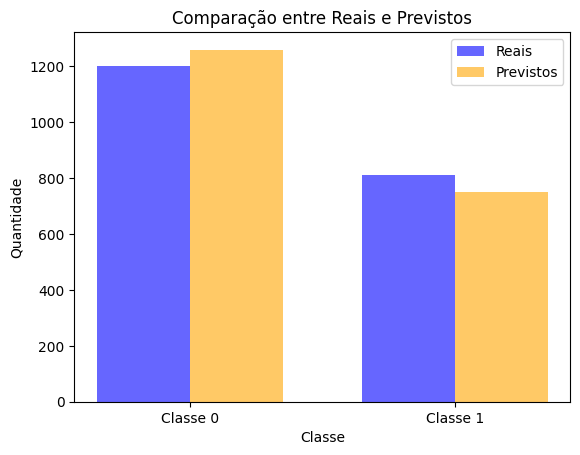

' \nPontuação média da validação cruzada: 0.6311\nErro de Treino (Acurácia): 1.0000, Erro de Treino (Erro): 0.0000\nErro de Teste (Acurácia): 0.6774, Erro de Teste (Erro): 0.3226\nErro de Treino (MAE): 0.0000\nErro de Teste (MAE): 0.3226\nAcurácia: 0.6774193548387096\nMatriz de Confusão:\n[[196  35]\n [ 95  77]]\nRelatório de Classificação:\n              precision    recall  f1-score   support\n\n           0       0.67      0.85      0.75       231\n           1       0.69      0.45      0.54       172\n\n    accuracy                           0.68       403\n   macro avg       0.68      0.65      0.65       403\nweighted avg       0.68      0.68      0.66       403\n\n'

In [ ]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# ======== BAGGING RANDOM FOREST ====================================

# ======== LENDO E SEPARANDO DATASET ================================

# lendo dataset
df = pd.read_csv('../water_potability.csv').dropna()

X = df.drop('Potability', axis=1) 
Y = df['Potability']  

# separando em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ======== CRIANDO E TREINANDO MODELO ================================

# Criar o modelo Random Forest
model = RandomForestClassifier()
# Treinar o modelo
model.fit(X_train, y_train)

# ========================== CALCULANDO PREVISÃO  =============================

# Fazer previsões no conjunto de teste
y_predTest = model.predict(X_test)

# Fazer previsões no conjunto de treino
y_train_pred = model.predict(X_train)

# ========================== CALCULANDO PRECISÃO  =============================

# Calcular a acurácia no treino (erro de treino)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy  # Erro de treino (quanto menor, melhor)

y_test_pred = model.predict(X_test)

# Calcular a acurácia no teste (erro de teste)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy  # Erro de teste (quanto menor, melhor)

# Fazer previsões no conjunto de teste

YPred = model.predict(X) 

# Opcional: calcular o erro absoluto médio (MAE) no treino e teste
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


# ========================== CALCULANDO PREVISÃO  =============================
# ================== RELATÓRIO DE CLASSIFICAÇÃO RESUMO EXEMPLOS =====================

"""
        precision    recall  f1-score   support

    0       0.65      0.84      0.73       231
    1       0.65      0.40      0.50       172 

- precision 0.65 significa que 65% das vezes que previu 0 estava correto
- recall: indica a porcentagem de exemplos da classe real que o modelo conseguiu identificar corretamente. Ou seja, dos exemplos que realmente pertencem a uma classe, quantos o modelo foi capaz de prever corretamente.

    Para a classe 0, o recall é 0.84, ou seja, 84% dos exemplos não potáveis foram identificados corretamente pelo modelo.
    Para a classe 1, o recall é 0.40, ou seja, o modelo conseguiu identificar corretamente apenas 40% dos exemplos potáveis.

-  F1-score: Para a classe 0, o F1-score é 0.73, o que reflete um bom equilíbrio entre precisão e recall.
Para a classe 1, o F1-score é 0.50, o que indica que o modelo tem um desempenho pior na classe 1 (potável), já que o recall é baixo.

- O support representa o número de ocorrências reais de cada classe no conjunto de dados.

    Para a classe 0 (não potável), há 231 exemplos.
    Para a classe 1 (potável), há 172 exemplos.

========== RESULTADOS =================

    Pontuação média da validação cruzada: 0.6405
    Erro de Treino (Acurácia): 1.0000, Erro de Treino (Erro): 0.0000
    Erro de Teste (Acurácia): 0.6526, Erro de Teste (Erro): 0.3474
    Erro de Treino (MAE): 0.0000
    Erro de Teste (MAE): 0.3474
    Acurácia: 0.652605459057072

    Matriz de Confusão:

            predito 0 | predito 1
    real 0  [194(TN)       37(FP)]
    real 1  [103(FN)       69(TP)]

    Relatório de Classificação:
                precision    recall  f1-score   support

            0       0.65      0.84      0.73       231
            1       0.65      0.40      0.50       172
    accuracy                            0.65       403
    macro avg       0.65      0.62      0.62       403 (médias de cada)
    weighted avg    0.65      0.65      0.63       403

    ph: 0.1379387096568688
    Hardness: 0.11741862970752964
    Solids: 0.11459307067885648
    Chloramines: 0.1136752351602551
    Sulfate: 0.14369073482107933
    Conductivity: 0.09203481756025772
    Organic_carbon: 0.09260289344656661
    Trihalomethanes: 0.09626490585536313
    Turbidity: 0.09178100311322318

- Accuracy (Acurácia): é a porcentagem de previsões corretas (tanto para classe 0 quanto para classe 1) sobre o total de exemplos.
    A acurácia geral é 0.65, ou seja, 65% das previsões feitas pelo modelo estão corretas.

"""
# ========================== RELATÓRIO DE CLASSIFICAÇÃO =============================

# Exibir os resultados
print(f"Erro de Treino (Acurácia): {train_accuracy:.4f}, Erro de Treino (Erro): {train_error:.4f}")
print(f"Erro de Teste (Acurácia): {test_accuracy:.4f}, Erro de Teste (Erro): {test_error:.4f}")
print(f"Erro de Treino (MAE): {train_mae:.4f}")
print(f"Erro de Teste (MAE): {test_mae:.4f}")

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_predTest))

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_predTest))

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_predTest))

# Exibir a importância das variáveis
importances = model.feature_importances_

# Exibir as características mais importantes
print("Pesos")
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

# ========================== PROCESSOS DE EXIBIÇÃO DOS GRÁFICOS =============================

# Calculando as contagens dos valores reais e previstos
valoresDifExistentes, cont_quantos_nos_reais = np.unique(Y, return_counts=True) # quantos valores de cada(0 e 1) existiram nos reais
_, cont_quantos_na_prev = np.unique(YPred, return_counts=True) # quantos valores de cada(0 e 1) existiram nas previsões


""" 
    # var que nn será usada = _
    # Valores será: [0, 1] ou seja, tds os valores diferentes que tem em Y
    # Contagem será: [2, 4]  (O número de vezes que 0 aparece é 2 e que 1 aparece é 4)

    # Garantir que ambos os arrays de contagem têm o mesmo tamanho
    # Caso algum dos valores (0 ou 1) não apareça nos dados previstos ou reais, preenchemos com zero

    zip(valoresDifExistentes, cont_quantos_nos_reais):

    A função zip pega dois iteráveis (como listas, arrays ou outras sequências) e os combina em pares.
    Por exemplo, se valoresDifExistentes = [0, 1] e cont_quantos_nos_reais = [10, 20], a função zip irá combinar as duas listas em pares de forma que (0, 10) e (1, 20) se tornem os pares resultantes.

    Usando o exemplo acima, o zip vai gerar uma sequência de pares, e o dict vai transformá-los em um dicionário: {0: 10, 1: 20}.

"""

cont_quantos_nos_reais = dict(zip(valoresDifExistentes, cont_quantos_nos_reais))
cont_quantos_na_prev = dict(zip(_, cont_quantos_na_prev))

# Garantir que ambos os conjuntos de dados tenham as mesmas chaves (0 e 1)
# Isso é necessário caso um valor de classe (0 ou 1) esteja ausente

"""
    O método get(0, 0) está tentando acessar o valor associado à chave 0.
    Se a chave 0 existir, ele retorna o valor associado a essa chave.
    Se a chave 0 não existir no dicionário (o que pode ocorrer se, por exemplo, não houver valores reais 0), ele retorna o valor 0 (o segundo argumento de get). 
"""
cont_quantos_nos_reais = {0: cont_quantos_nos_reais.get(0, 0), 1: cont_quantos_nos_reais.get(1, 0)}
cont_quantos_na_prev = {0: cont_quantos_na_prev.get(0, 0), 1: cont_quantos_na_prev.get(1, 0)}

# Plotando o gráfico
bar_width = 0.35  # Largura das barras
index = np.arange(2)  # Existem 2 classes: 0 e 1

# Plotando as barras para valores reais e previstos
plt.bar(index, list(cont_quantos_nos_reais.values()), bar_width, color='blue', alpha=0.6, label="Reais")
plt.bar(index + bar_width, list(cont_quantos_na_prev.values()), bar_width, color='orange', alpha=0.6, label="Previstos")
# list(cont_quantos_na_prev.values())  # Retorna [150, 253], por exemplo

# Ajustando o gráfico
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.title("Comparação entre Reais e Previstos")
plt.xticks(index + bar_width / 2, ['Classe 0', 'Classe 1'])
plt.legend()

plt.show()

""" 
Pontuação média da validação cruzada: 0.6311
Erro de Treino (Acurácia): 1.0000, Erro de Treino (Erro): 0.0000
Erro de Teste (Acurácia): 0.6774, Erro de Teste (Erro): 0.3226
Erro de Treino (MAE): 0.0000
Erro de Teste (MAE): 0.3226
Acurácia: 0.6774193548387096
Matriz de Confusão:
[[196  35]
 [ 95  77]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       231
           1       0.69      0.45      0.54       172

    accuracy                           0.68       403
   macro avg       0.68      0.65      0.65       403
weighted avg       0.68      0.68      0.66       403

"""


